In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2,c1,c2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, c1, c2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2) + c1 * (x1)**3 + c2 * (x1 - x2)**3) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + c2 * (x2 - x1)**3) / m2]
    return f

In [29]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np
# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0
#norlinear coefficients
c1= -1/6
c2= -1/10
# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -0.6
y1 = 0.5
x2 = 3.001
y2 = 5.9

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 150.0
numpoints = 1250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, c1, c2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo33.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print  (t1, w1[0], w1[1], w1[2], w1[3],file=f)

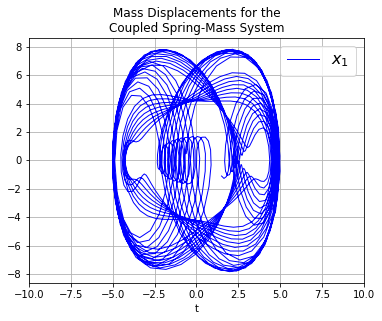

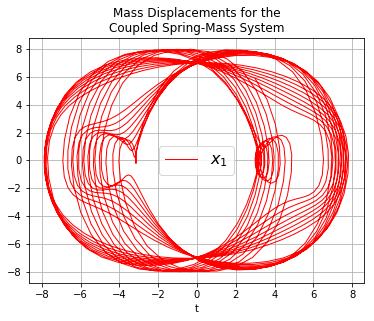

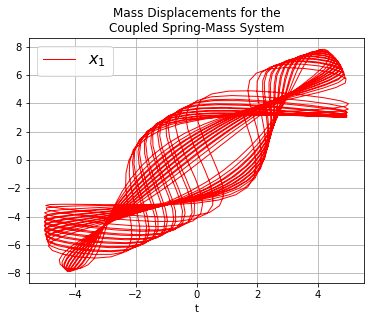

In [1]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
import matplotlib.pyplot as plt
t, x1, y1, x2, y2 = loadtxt('ejemplo33.dat', unpack=True)


import numpy as np

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1
plt.xlim([-10,10])
plot(x1, y1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('ejemplo33_1.png', dpi=100)

#############################
#############################
import numpy as np

figure(2, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(x2, y2, 'r', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('ejemplo33_2.png', dpi=100)
###############################
################################


###########################################
###########################################

import numpy as np

figure(6, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1


plot(x1,x2, 'r', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('ejemplo33_3.png', dpi=100)